In [1]:
import pickle
import generate_data
import matplotlib.pyplot as plt

In [2]:
data = generate_data.load_data("data_ising_triangular_largeL.pkl")
print(data[8].keys())

dict_keys(['Ts', 'absM', 'M', 'N_bins', 'C', 'UB', 'N_measure', 'chi', 'L', 'E', 'observables'])


In [3]:
def plot_obs(key, ax=None):
    if ax is None:
        plt.figure(figsize=(10, 7))
        ax = plt.gca()
    for L in data['Ls']:
        data_L = data[L]
        ax.errorbar(data_L['Ts'], data_L[key][:, 0], data_L[key][:, 1], label='L={L: 3d}'.format(L=L))
    ax.set_xlabel('T')
    ax.set_ylabel(key)
    ax.legend()
    #pl.show('web-agg')
    return ax
    

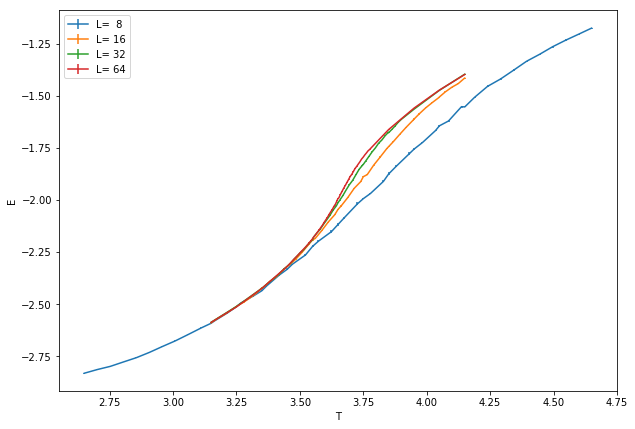

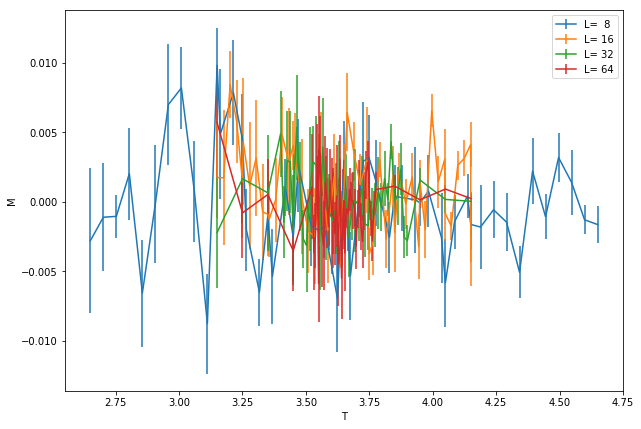

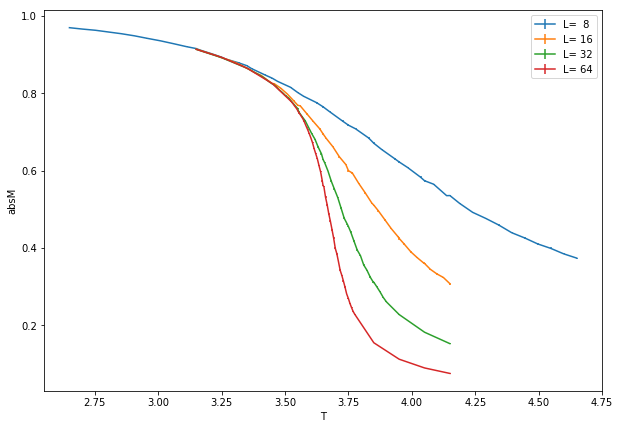

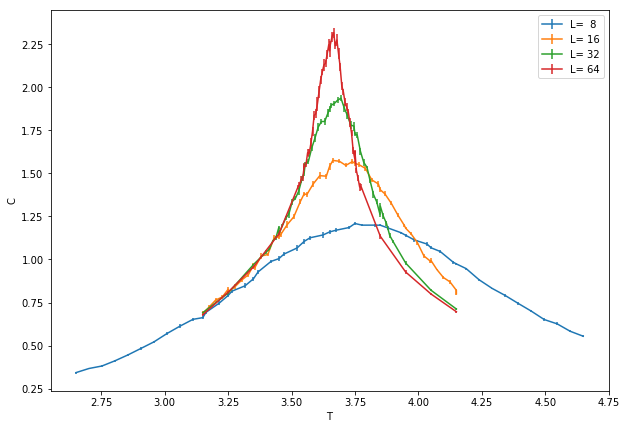

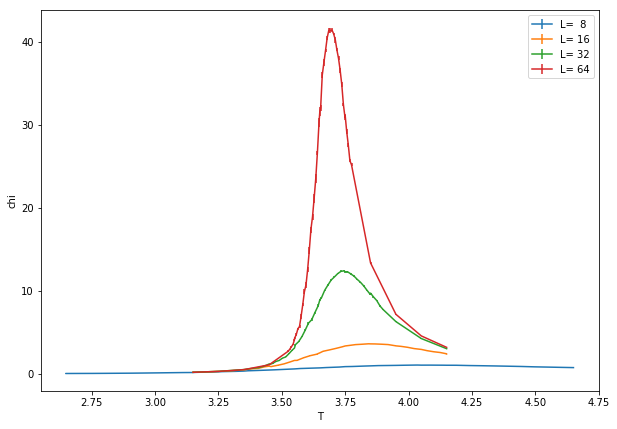

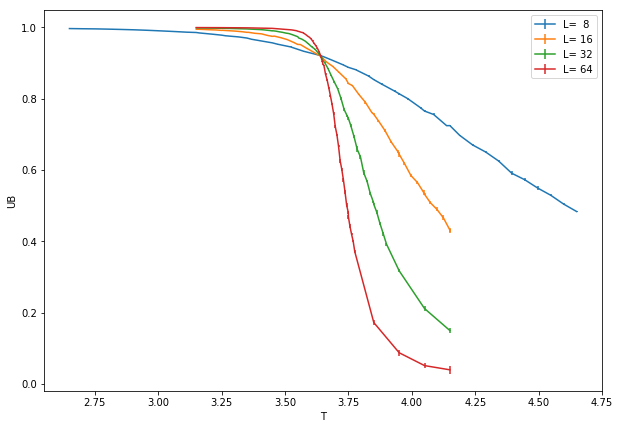

In [4]:
plot_obs('E')
plot_obs('M')
plot_obs('absM')
plot_obs('C')
plot_obs('chi')
ax = plot_obs('UB')
#ax.set_xlim(2.2, 2.4)
plt.show()


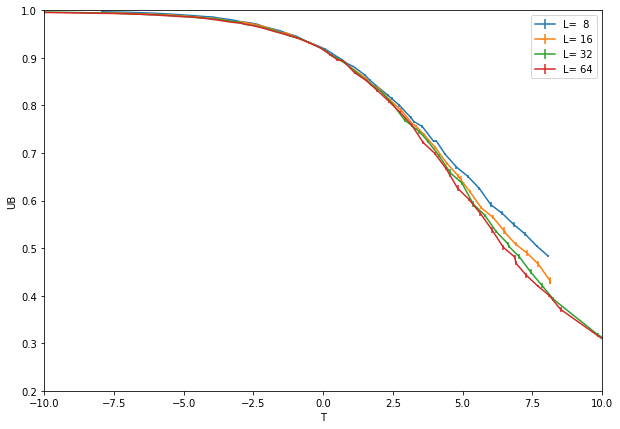

In [5]:
Tc = 3.642
nu = 1.0
key = 'UB'
plt.figure(figsize=(10, 7))
ax = plt.gca()
for L in data['Ls']:
        data_L = data[L]
        d = data_L[key] 
        tau = (data_L['Ts'] - Tc)* L **(1./nu)
        ax.errorbar(tau, d[:, 0], d[:, 1], label='L={L: 3d}'.format(L=L))
ax.set_xlabel('T')
ax.set_ylabel(key)
ax.set_xlim(-10, 10)
ax.set_ylim(0.2, 1.)
ax.legend()
plt.show()


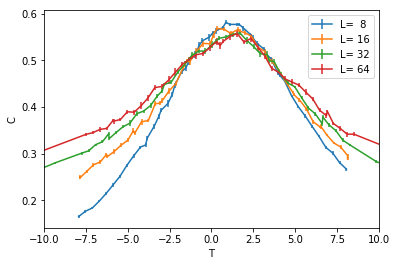

In [6]:
alpha = 0.
key = 'C'
ax = plt.gca()
for L in data['Ls']:
        data_L = data[L]
        d = data_L[key] /np.log(L)#/ L**(alpha/nu)
        tau = (data_L['Ts'] - Tc)* L **(1./nu)
        ax.errorbar(tau, d[:, 0], d[:, 1], label='L={L: 3d}'.format(L=L))
ax.set_xlabel('T')
ax.set_ylabel(key)
ax.set_xlim(-10, 10)
#ax.set_ylim(0.6, 1.)
ax.legend()
plt.show()

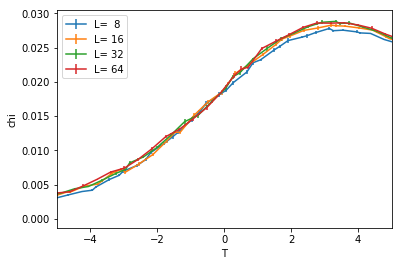

In [7]:
gamma = 1.75
key = 'chi'
ax = plt.gca()
for L in data['Ls']:
        data_L = data[L]
        d = data_L[key] / L**(gamma/nu)
        tau = (data_L['Ts'] - Tc)* L **(1./nu)
        ax.errorbar(tau, d[:, 0], d[:, 1], label='L={L: 3d}'.format(L=L))
ax.set_xlabel('T')
ax.set_ylabel(key)
ax.set_xlim(-5, 5)
#ax.set_ylim(0.6, 1.)
ax.legend()
plt.show()

# Conclusion

The critical temperature is different ($T_c\approx 3.65 $ on the triangular vs $T_c \approx 2.27$ on the square lattice),
but all the critical exponents are actually the same - this is the reason they are called "universal": different microscopic models show the same behaviour near the phase transition. It can be understood from the scale invariance at the critical point and renormalization group (RG) flows.
